# Test network model

In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from logger import logger
from networkmodel import NetworkModel
from utils import *

### Construct model

 2024/03/05 18:25:56: connectivity matrix:
post      E     PV   SST
pre                     
E     0.002  0.040  0.09
PV   -0.015 -0.135 -0.86
SST  -0.135 -0.020  0.00
 2024/03/05 18:25:56: time constants:
E      0.010
PV     0.005
SST    0.005
Name: tau (s), dtype: float64


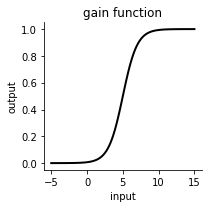

In [68]:
# Population names
populations = ['E', 'PV', 'SST']
    
# Connectivity matrix (from Plaksin et al. 2016)
W = pd.DataFrame(
    data=[
        [0.002, 0.04, 0.09],      # E -> E, PV, SST 
        [-0.015, -0.135, -0.86],  # PV -> E, PV, SST
        [-0.135, -0.02, 0]        # SST -> E, PV, SST
    ], 
    index=pd.Index(populations, name='pre'), 
    columns=pd.Index(populations, name='post')
)

# Time constants
tau = pd.Series(
    data={
        'E': 0.01, 
        'PV': .005, 
        'SST': .005
    },
    name='tau (s)'
)

# Gain function
# fgain = lambda x: mysqrt(x, A=1, x0=1)
fgain = lambda x: sigmoid(x, x0=5, sigma=1)

# Initialize model
model = NetworkModel(W, tau, fgain)
logger.info(f'connectivity matrix:\n{model.Wstr}')
logger.info(f'time constants:\n{model.taustr}')

# Plot model gain function
fig = model.plot_fgain()

### Run simulation

 2024/03/05 18:27:18: initial conditions


,activity
E,0.006686
PV,0.006688
SST,0.006659


 2024/03/05 18:27:18: external input


,external input
E,2.0
PV,0.0
SST,3.0


 2024/03/05 18:27:18: NetworkModel([E, PV, SST]): running 1.0 s long simulation
 2024/03/05 18:27:18: simulation completed in 0.008 s


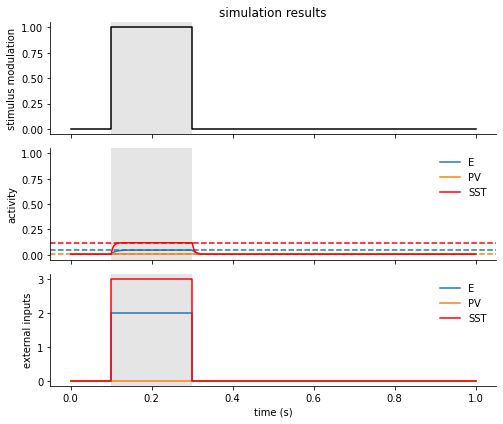

In [76]:
# Initial conditions
r0 = model.compute_steady_state()
logger.info('initial conditions')
display(r0.to_frame())

# External input
s = pd.Series({
    'E': 2.,
    'PV': 0.,
    'SST': 3., 
}, name='external input')
logger.info('external input')
display(s.to_frame())

# Find stead-state activity for given input amplitudes
rss = model.compute_steady_state(s=s)

# Simulate model
tstop = 1.  # s
data = model.simulate(r0, tstop, s=s)

# Plot results
fig1 = model.plot_timeseries(data, ss=rss)
# fig2 = model.plot_trajectory(data, ss=rss)